In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [16]:
df_female = pd.read_csv('data/Copy of Mouse_Data_Student_Copy.xlsx - Fem Act.csv')
df_male = pd.read_csv('data/Copy of Mouse_Data_Student_Copy.xlsx - Male Act.csv')

df_female = df_female.set_index('time')
df_male = df_male.set_index('time')
df_female.index = df_female.index / 60
df_male.index = df_male.index / 60

df_female = df_female.groupby(df_female.index.astype(int)).mean().reset_index()
df_male = df_male.groupby(df_male.index.astype(int)).mean().reset_index()

In [17]:
# create date and hour column
df_female['day'] = df_female['time'] // 24 + 1
df_female['hour'] = df_female['time'] % 24
df_male['day'] = df_male['time'] // 24 + 1
df_male['hour'] = df_male['time'] % 24

# check if it's night
df_female['is_night'] = (df_female['hour'] // 12).astype(bool)
df_male['is_night'] = (df_male['hour'] // 12).astype(bool)

# check the estrus of female
df_female['is_estrus'] = ~((df_female['day'] - 2) % 4).astype(bool)

# while male don't have estrus, display it for male as well
df_male['is_estrus'] = ~((df_male['day'] - 2) % 4).astype(bool)

In [18]:
df_male

,time,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,day,hour,is_night,is_estrus
0,0,22.474576,17.016949,15.338983,30.542373,59.322034,32.576271,30.830508,35.389831,22.949153,25.237288,36.338983,24.983051,41.101695,1,0,False,False
1,1,43.216667,65.666667,49.183333,76.066667,48.366667,59.500000,65.616667,41.316667,41.683333,56.683333,53.516667,60.450000,56.166667,1,1,False,False
2,2,50.083333,58.183333,36.483333,75.966667,52.250000,61.584306,54.483333,43.400000,39.300000,54.216667,31.183333,64.416667,55.266667,1,2,False,False
3,3,47.916667,57.100000,37.483333,80.750000,69.866667,69.750000,76.533333,45.216667,37.500000,33.983333,38.383333,65.916667,50.816667,1,3,False,False
4,4,41.733333,49.550000,20.900000,83.950000,60.716667,20.016667,69.133333,41.116667,44.550000,32.150000,55.466667,57.650000,48.833333,1,4,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,332,7.116667,0.000000,17.066667,0.000000,7.916667,0.000000,22.916667,0.000000,2.600000,1.900000,28.600000,6.560855,0.000000,14,20,True,True
333,333,13.950000,0.000000,7.433333,0.000000,46.993590,0.000000,0.800000,0.000000,7.283333,8.500000,1.650000,6.916667,0.000000,14,21,True,True
334,334,15.750000,0.000000,23.883333,0.000000,5.616667,0.000000,2.633333,0.000000,6.900000,19.766667,7.166667,17.550000,0.000000,14,22,True,True
335,335,9.333333,0.000000,4.666667,0.000000,54.610257,0.000000,25.383333,0.000000,11.700000,14.566667,19.116667,15.016667,0.000000,14,23,True,True


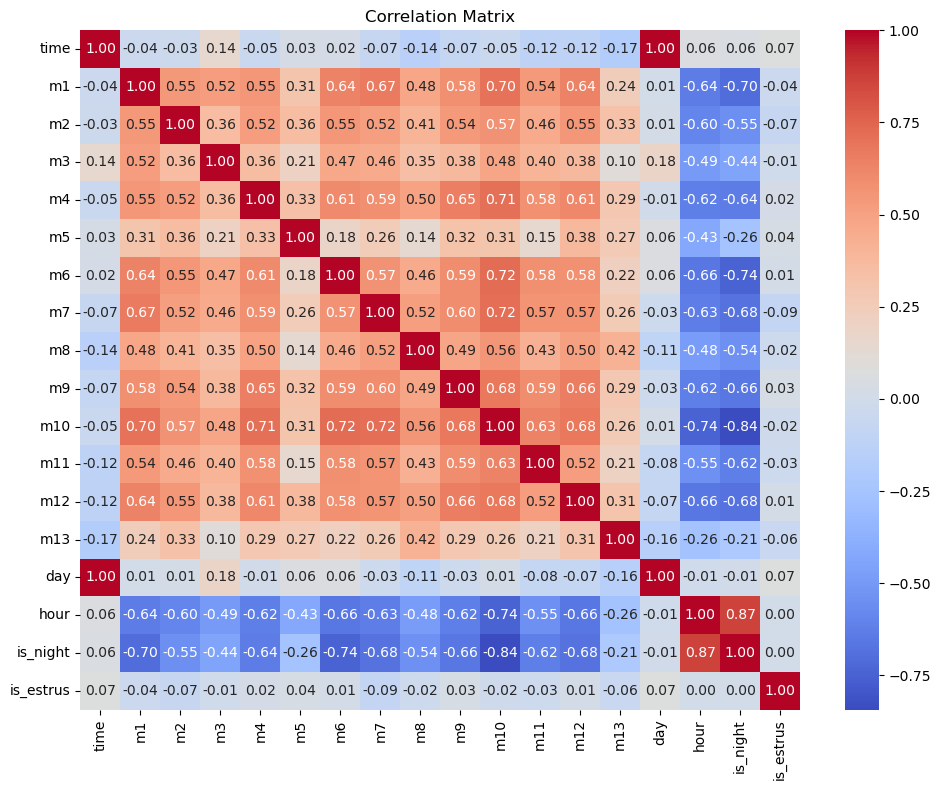

In [19]:
correlation_matrix = df_male.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [30]:
fig = go.Figure()

# Add each mouse's data as a separate line
for column in df_female.iloc[:,1:-4].columns:
    fig.add_trace(go.Scatter(x=df_female['time'], 
                            y=df_female[column],
                            name=column))

# Add rectangles for night and estrus periods
night_color = 'rgba(0, 0, 255, 0.3)'  # Blue for night
estrus_color = 'rgba(255, 0, 0, 0.5)' # Red for estrus

# Iterate through each row of the DataFrame
for i, row in df_female.iterrows():
    if row['is_night']:
        fig.add_shape(
            type="rect",
            x0=row['time'] - 0.5,
            x1=row['time'] + 0.5,
            y0=0,
            y1=1,
            fillcolor=night_color,
            opacity=0.2,
            line_width=0,
            xref='x',
            yref='y domain'
        )
    if row['is_estrus']:
        fig.add_shape(
            type="rect",
            x0=row['time'] - 0.5,
            x1=row['time'] + 0.5,
            y0=0,
            y1=1,
            fillcolor=estrus_color,
            opacity=0.2,
            line_width=0,
            xref='x',
            yref='y domain'
        )

# Update layout
fig.update_layout(
    title='Female Mouse Activity',
    xaxis_title='Time',
    yaxis_title='Activity',
    legend_title='Mouse ID',
    legend=dict(
        yanchor="top",
        y=1,
        xanchor="left",
        x=1
    )
)

fig.show()

In [20]:
# group by the time of the day and take the mean
male_hourly = df_male.groupby(['hour']).mean()
female_hourly = df_female.groupby(['hour']).mean()

In [31]:
fig = go.Figure()

# Add each mouse's data as a separate line
for column in male_hourly.iloc[:,1:-3].columns:
    fig.add_trace(go.Scatter(x=male_hourly.index, 
                            y=male_hourly[column],
                            name=column))

# Update layout
fig.update_layout(
    title='Male Mouse Activity by Hour',
    xaxis_title='Hour',
    yaxis_title='Activity',
    legend_title='Mouse ID',
    legend=dict(
        yanchor="top",
        y=1,
        xanchor="left",
        x=1
    )
)

fig.show()

In [32]:
fig = go.Figure()

# Add each mouse's data as a separate line
for column in female_hourly.iloc[:,1:-3].columns:
    fig.add_trace(go.Scatter(x=female_hourly.index, 
                            y=female_hourly[column],
                            name=column))

# Update layout
fig.update_layout(
    title='Female Mouse Activity by Hour',
    xaxis_title='Hour',
    yaxis_title='Activity',
    legend_title='Mouse ID',
    legend=dict(
        yanchor="top",
        y=1,
        xanchor="left",
        x=1
    )
)

fig.show()